# WiFi Indoors Locationing ####

In [448]:
###############################################################################
# Title: WiFi Indoors Lacationing
# Author: Yigit Dereobali
# Version: 1.3
# Date: 09.17.2019
# Description: Location of the user will be predicted
# according to its WiFi fingerprint in a multi story multi building campus
###############################################################################

In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



# Import and Inspect Data ####

Check training and validation rawdata to understand their structure 

In [450]:
# import data
training_rawdata = pd.read_csv("/Users/hasanyigitdereobali/Downloads/UJIndoorLoc 2/trainingData.csv")
validation_rawdata = pd.read_csv("/Users/hasanyigitdereobali/Downloads/UJIndoorLoc 2/validationData.csv")

In [451]:
# ispect validation data
validation_rawdata.head(10)

# validation data set does not have spaceid and reletive position.

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
5,100,100,100,100,100,100,100,100,100,100,...,100,-7338.807210,4.864825e+06,2,2,0,0,0,12,1380874853
6,100,100,100,100,100,100,100,100,100,100,...,100,-7379.351683,4.864849e+06,3,2,0,0,0,20,1380874982
7,100,100,100,100,100,100,100,100,100,100,...,100,-7340.558777,4.864759e+06,3,2,0,0,0,21,1380875085
8,100,100,100,100,100,100,100,100,100,100,...,100,-7357.531253,4.864766e+06,2,2,0,0,0,12,1380875092
9,100,100,100,100,100,100,100,100,100,100,...,100,-7345.085170,4.864831e+06,0,2,0,0,0,20,1380875118


In [452]:
# check training data frame
training_rawdata.info()

# 529 x 19937 data frame, numeric values only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [453]:
# check validation data frame
validation_rawdata.info()

# 529 x 11111 data frame, numeric values only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 4.5 MB


In [454]:
# check training data NAs
(training_rawdata.isnull().sum()).sum()

0

In [455]:
# check training data NAs
(validation_rawdata.isnull().sum()).sum()

0

# Visualize Rawdata ####

I want to plot signal strengths of each WAP.

In [456]:
# transpose training raw data for visualisation of the WAPs
training_rawdata_transposed = training_rawdata.transpose()

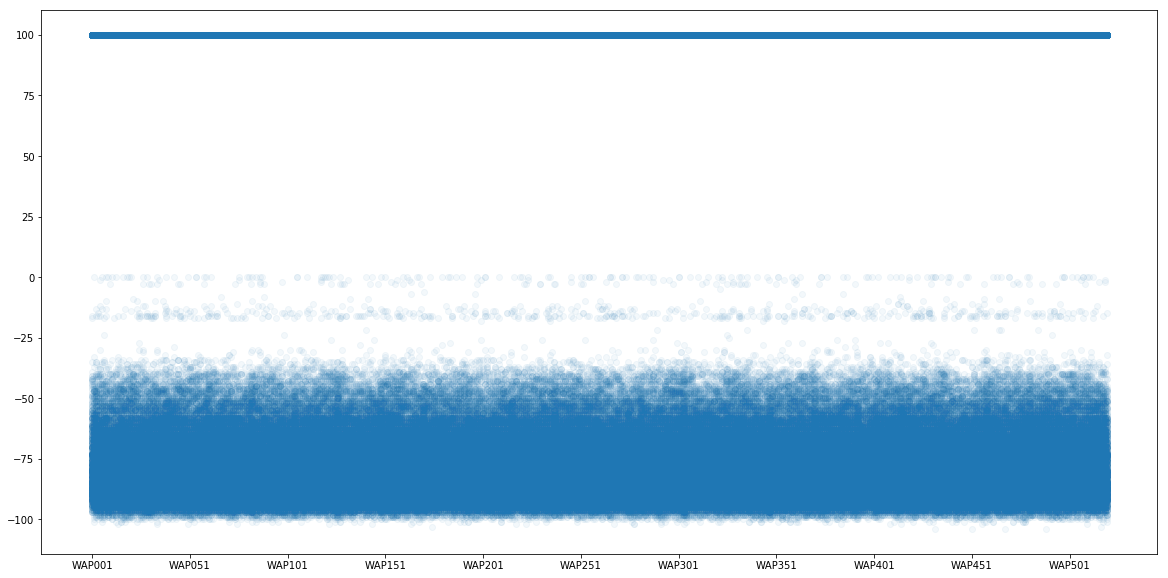

In [457]:
# visualise WAPs and their signal strength
from itertools import chain
f, (ax1) = plt.subplots(1, 1, sharey = True, figsize = (20, 10))
ax1 = plt.scatter( list(chain.from_iterable( [training_rawdata_transposed.index.values[0:520].tolist()]*19937)), 
            training_rawdata_transposed.iloc[0:520,0:19937], 
            alpha=0.05)
plt.xticks(np.arange(0, 520, step=50))
plt.show()

Undetected WAPs are marked with 100
Detected WAPs are scattered between 0 and -100. 
These 2 high signal strength might be justified as outliers, but first let us check the validation data too.

In [458]:
# transpose validation raw data for visualisation
validation_rawdata_transposed = validation_rawdata.transpose()

In [459]:
validation_rawdata.shape

(1111, 529)

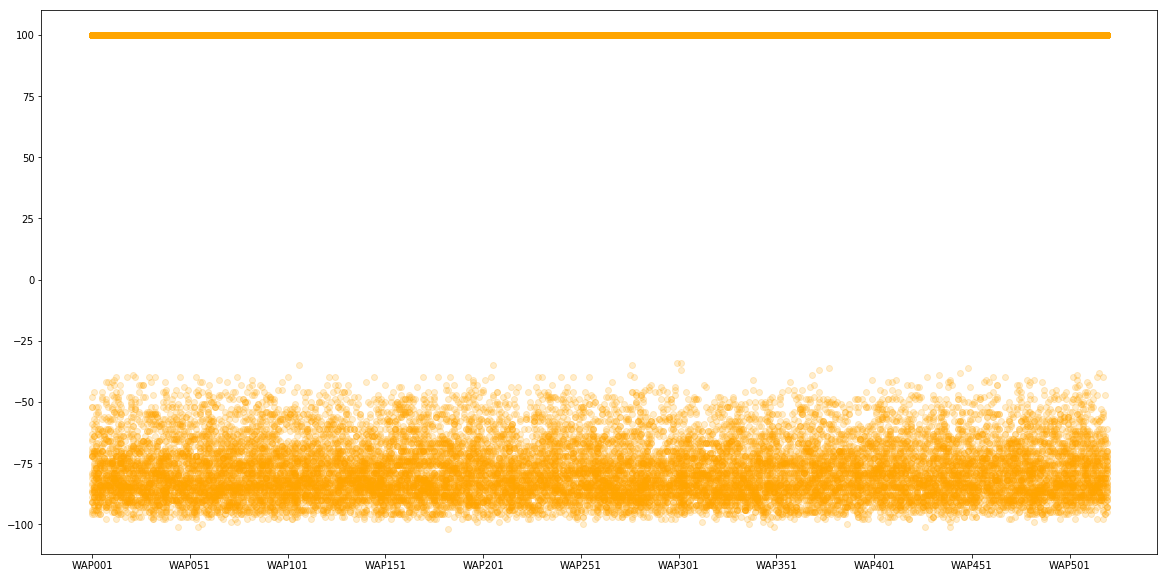

In [460]:
# visualise validation WAPs and their signal strength
from itertools import chain
f, (ax2) = plt.subplots(1, 1, sharey = True, figsize = (20, 10))
ax2 = plt.scatter( list(chain.from_iterable( [validation_rawdata_transposed.index.values[0:520].tolist()]*1111)), 
            validation_rawdata_transposed.iloc[0:520,0:1111], 
            alpha=0.2, c="orange")
plt.xticks(np.arange(0, 520, step=50))
plt.show()

Validation data set does not have measured signal strength above -30. I will consider signal strength above -30 as outlier

I want to plot the same chart with a for loop. Just for my confidence.

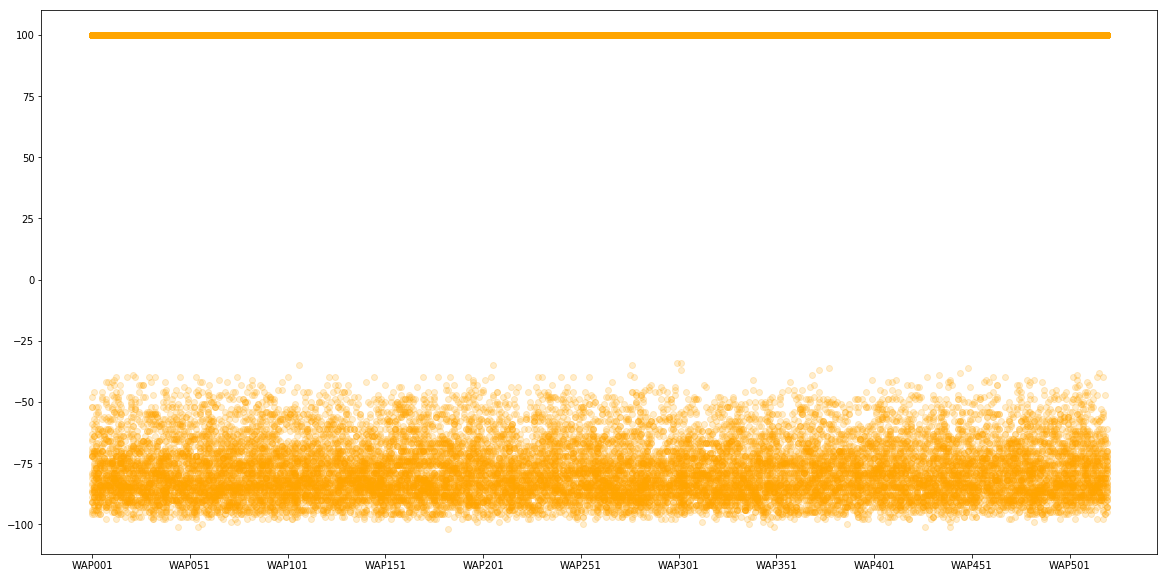

In [461]:
# visualise validation WAPs and their signal strength

# with for loop instead of chain
from itertools import chain
f, (ax2) = plt.subplots(1, 1, sharey = True, figsize = (20, 10))


list1 = []


for  i in range(0,1111):
    for j in range(0,520):
        list1.append(validation_rawdata_transposed.index.values[j])
        
        
    
ax2 = plt.scatter( list1, 
            validation_rawdata_transposed.iloc[0:520,0:1111], 
            alpha=0.2, c="orange")
plt.xticks(np.arange(0, 520, step=50))
plt.show()

In [462]:
# for exporting data frame if needed
#export_csv = training_rawdata_transposed.to_csv (r'/Users/hasanyigitdereobali/Downloads/export_dataframe2.csv', 
#                                                 index = True, header=True)

# Compare Training and Validation Data Sets ####

### Training data set

In [463]:
# check 0 variance features in training data set
(training_rawdata.std() == 0).sum()

# 55 WAP features have 0 variance in training data set

55

55 features have zero variance and they do not generate value for training

In [464]:
# number of low variance columns
(training_rawdata.iloc[:, :520].std()<= 2).sum()

90

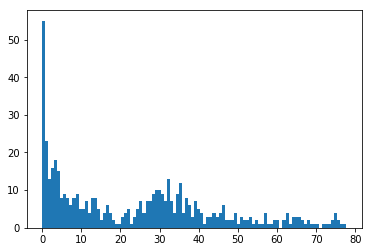

In [446]:
# variance distribution in training data set
p = plt.hist(training_rawdata.iloc[:, :520].std(), bins=100)

In [465]:
# zero variance features data frame
zero_std_training = pd.DataFrame(data = (training_rawdata.std() == 0), columns=["zero_variance"])

In [466]:
# names of 0 variance features
zero_std_training[zero_std_training["zero_variance"] == True].index

Index(['WAP003', 'WAP004', 'WAP092', 'WAP093', 'WAP094', 'WAP095', 'WAP152',
       'WAP158', 'WAP159', 'WAP160', 'WAP215', 'WAP217', 'WAP226', 'WAP227',
       'WAP238', 'WAP239', 'WAP240', 'WAP241', 'WAP242', 'WAP243', 'WAP244',
       'WAP245', 'WAP246', 'WAP247', 'WAP254', 'WAP293', 'WAP296', 'WAP301',
       'WAP303', 'WAP304', 'WAP307', 'WAP333', 'WAP349', 'WAP353', 'WAP360',
       'WAP365', 'WAP416', 'WAP419', 'WAP423', 'WAP429', 'WAP433', 'WAP438',
       'WAP441', 'WAP442', 'WAP444', 'WAP445', 'WAP451', 'WAP458', 'WAP482',
       'WAP485', 'WAP487', 'WAP488', 'WAP491', 'WAP497', 'WAP520'],
      dtype='object')

In [467]:
# number of features with mean of 100
(training_rawdata.mean()==100).sum()

# number of features with a mean of 100 is also 55

55

### Validation data set

In [468]:
# check 0 variance features in validation data set
(validation_rawdata.std()==0).sum()

# 156 WAP features have 0 variance in training data set

156

In [469]:
# 0 variance features data frame
zero_std_validation = pd.DataFrame(data = (validation_rawdata.std() == 0), columns=["zero_variance"])

In [470]:
# 0 variance features names in validation data set
zero_std_validation[zero_std_validation["zero_variance"] == True].index

Index(['WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP079', 'WAP133', 'WAP157',
       'WAP163', 'WAP193', 'WAP194',
       ...
       'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519',
       'SPACEID', 'RELATIVEPOSITION', 'USERID'],
      dtype='object', length=156)

In [471]:
# 0 variance features set from validation data set
validation_std0 = set(zero_std_validation[zero_std_validation["zero_variance"] == True].index)

In [472]:
# number of 0 variance features in validation data set
len(validation_std0)

156

In [473]:
# number of features with a mean of 100 is 153 - not 156 - WHY?
(validation_rawdata.mean()==100).sum()

153

In [474]:
# set of mean 100 features in validation data set
hundred_mean_validation = pd.DataFrame(data = (validation_rawdata.mean() == 100), columns=["hundred_mean"])

# names of mean 100 features in validation data set
hundred_mean_validation[hundred_mean_validation["hundred_mean"] == True].index

Index(['WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP079', 'WAP133', 'WAP157',
       'WAP163', 'WAP193', 'WAP194',
       ...
       'WAP510', 'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516',
       'WAP517', 'WAP518', 'WAP519'],
      dtype='object', length=153)

In [475]:
# set of mean 100 features in validation data set
validation_mean100 = set(hundred_mean_validation[hundred_mean_validation["hundred_mean"] == True].index)

In [476]:
# return Non-WAP features from validation data set with 0 variance 
validation_std0- validation_mean100

# These 3 features below have 0 variance in addition to 0 variance WAP features

{'RELATIVEPOSITION', 'SPACEID', 'USERID'}

### Are 0 variance WAP features the same in both training and validation data sets? => NO

In [477]:
# WAP features with 0 variance in training data set have variance in validation data set
validation_rawdata[zero_std_training[zero_std_training["zero_variance"] == True].index].std().head()

WAP003    7.888265
WAP004    7.888607
WAP092    7.718513
WAP093    8.015379
WAP094    9.467806
dtype: float64

### I will drop all 0 variance WAP features during preprocessing from training data set

In [478]:
training_rawdata2 =  training_rawdata.drop(zero_std_training[zero_std_training["zero_variance"] == True].index, axis=1)

In [479]:
(training_rawdata2.std() == 0).sum()

0

###  But, there will be 0 variance features in validation set

In [480]:
validation_rawdata2 =  validation_rawdata.drop(zero_std_training[zero_std_training["zero_variance"] == True].index, axis=1)

In [481]:
(validation_rawdata2.std() == 0).sum()

156

# Buildings  in training and validation data sets ####

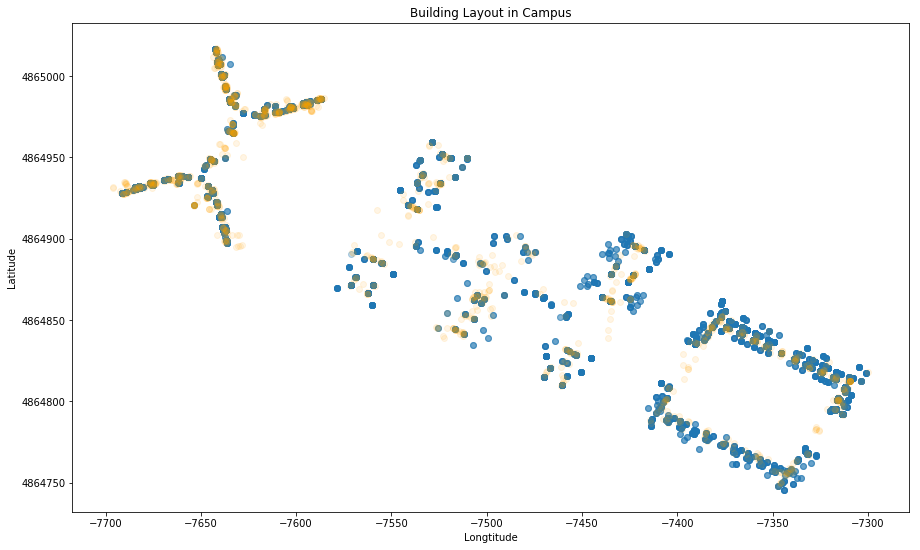

In [482]:
# plot building layout
f, (ax0) = plt.subplots(1, 1, sharey = True, figsize = (15, 9))
ax0.scatter(training_rawdata["LONGITUDE"], training_rawdata["LATITUDE"], alpha=0.1)
ax0.scatter(validation_rawdata["LONGITUDE"], validation_rawdata["LATITUDE"], alpha=0.1, c="orange")
ax0.set_title("Building Layout in Campus")
ax0.set_xlabel("Longtitude")
ax0.set_ylabel("Latitude")
plt.show()

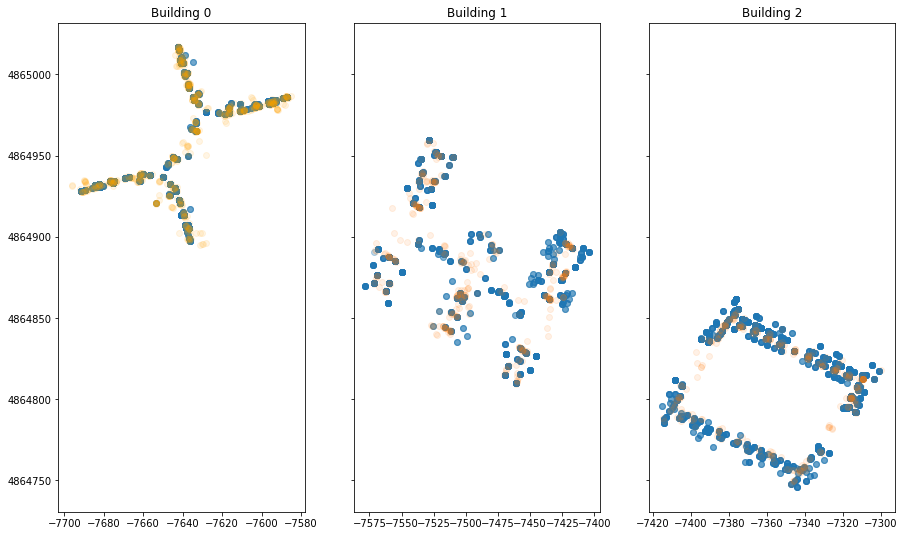

In [483]:
# plot individual buildings
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 9))
ax1.scatter(training_rawdata[training_rawdata["BUILDINGID"] == 0]["LONGITUDE"], 
            training_rawdata[training_rawdata["BUILDINGID"] == 0]["LATITUDE"], alpha=0.1)
ax1.scatter(validation_rawdata[validation_rawdata["BUILDINGID"] == 0]["LONGITUDE"], 
            validation_rawdata[validation_rawdata["BUILDINGID"] == 0]["LATITUDE"], alpha=0.1, c="orange")
ax1.set_title("Building 0")
ax2.scatter(training_rawdata[training_rawdata["BUILDINGID"] == 1]["LONGITUDE"], 
            training_rawdata[training_rawdata["BUILDINGID"] == 1]["LATITUDE"], alpha=0.1)
ax2.scatter(validation_rawdata[validation_rawdata["BUILDINGID"] == 1]["LONGITUDE"], 
            validation_rawdata[validation_rawdata["BUILDINGID"] == 1]["LATITUDE"], alpha=0.1)
ax2.set_title("Building 1")
ax3.scatter(training_rawdata[training_rawdata["BUILDINGID"] == 2]["LONGITUDE"], 
            training_rawdata[training_rawdata["BUILDINGID"] == 2]["LATITUDE"], alpha=0.1)
ax3.scatter(validation_rawdata[validation_rawdata["BUILDINGID"] == 2]["LONGITUDE"], 
            validation_rawdata[validation_rawdata["BUILDINGID"] == 2]["LATITUDE"], alpha=0.1)
ax3.set_title("Building 2")

plt.show()

# Floors of buildings in training and validation data sets

In [484]:
# floors of building 0 in training data set
np.sort(training_rawdata["FLOOR"][training_rawdata["BUILDINGID"]==0].unique())

array([0, 1, 2, 3])

In [485]:
# floors of building 0 in validation data set
np.sort(validation_rawdata["FLOOR"][validation_rawdata["BUILDINGID"]==0].unique())

array([0, 1, 2, 3])

In [486]:
# floors of building 1 in training data set
np.sort(training_rawdata["FLOOR"][training_rawdata["BUILDINGID"]==1].unique())

array([0, 1, 2, 3])

In [487]:
# floors of building 1 in validation data set
np.sort(validation_rawdata["FLOOR"][validation_rawdata["BUILDINGID"]==1].unique())

array([0, 1, 2, 3])

In [488]:
# floors of building 2 in training data set
np.sort(training_rawdata["FLOOR"][training_rawdata["BUILDINGID"]==2].unique())

array([0, 1, 2, 3, 4])

In [489]:
# floors of building 2 in validation data set
np.sort(validation_rawdata["FLOOR"][validation_rawdata["BUILDINGID"]==2].unique())

array([0, 1, 2, 3, 4])

([<matplotlib.axis.XTick at 0x1a1828fe80>,
 <a list of 3 Text xticklabel objects>)

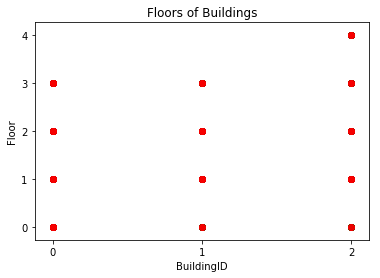

In [490]:
# plot floors of buildings
plt.scatter(training_rawdata["BUILDINGID"], training_rawdata["FLOOR"], alpha=0.1, c="green")
plt.scatter(validation_rawdata["BUILDINGID"], validation_rawdata["FLOOR"], alpha=0.1, c="red")
plt.title("Floors of Buildings")
plt.xlabel("BuildingID")
plt.ylabel("Floor")
plt.xticks(np.arange(0, 3, step=1))

# Longtitude and Latitude in training and validation data sets

In [491]:
# create classes of longtitude - latitude pairs
training_rawdata_h = training_rawdata.copy()
training_rawdata_h["horizontal_id"] = training_rawdata_h["LONGITUDE"].map(str) + "/" + training_rawdata_h["LATITUDE"].map(str)

In [492]:
# Number of classes of longtitude-latitude pairs in training data set
len(training_rawdata_h["horizontal_id"].unique())

692

In [493]:
# create classes of longtitude - latitude pairs in validatio data set
validation_rawdata_h = validation_rawdata.copy()
validation_rawdata_h["horizontal_id"] = validation_rawdata_h["LONGITUDE"].map(str) + "/" + validation_rawdata_h["LATITUDE"].map(str)

In [494]:
# Number of classes of longtitude-latitude pairs in validation data set
len(validation_rawdata_h["horizontal_id"].unique())

1067

# Preprocess Data ####

### Clean Training Data

In [495]:
# the weakest signal measurement in training data set
training_rawdata.iloc[:,:520].min().min()

-104

In [496]:
# the weakest signal measurement in validation data set
validation_rawdata.iloc[:,:520].min().min()

-102

In [497]:
# substitute undetected WAPs through -110 in training data set
training_data = training_rawdata.copy()
training_data[training_data.iloc[:, :520]==100] = -110

In [498]:
(training_rawdata.iloc[:, :520]==100).sum().sum()

10008477

In [499]:
(training_rawdata.iloc[:, :520]==-110).sum().sum()

0

In [500]:
(training_data.iloc[:, :520]==100).sum().sum()

0

In [501]:
(training_data.iloc[:, :520]==-110).sum().sum()

10008477

In [502]:
training_data.iloc[:, :520].max().max()

0

In [503]:
training_data.iloc[:, :520].min().min()

-110

In [504]:
# delete 0 variance features
training_data =  training_data.drop(zero_std_training[zero_std_training["zero_variance"] == True].index, axis=1)

In [505]:
(training_data.std() == 0).sum()

0

In [506]:
# delete unused columns
training_data = training_data.drop(["SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"], axis=1)

### Remove Outliers

In [507]:
# check shape of training data
training_data.shape

(19937, 469)

In [508]:
# copy training data
training_data31 = training_data.copy()

In [509]:
# filter > -30 measurements
training_data32 = training_data.where(training_data.iloc[:, :-4] <= -30)

In [510]:
# add other columns
training_data32["LONGITUDE"] = training_data31["LONGITUDE"]
training_data32["LATITUDE"] = training_data31["LATITUDE"]
training_data32["FLOOR"] = training_data31["FLOOR"]
training_data32["BUILDINGID"] = training_data31["BUILDINGID"]

In [511]:
training_data32.isnull().sum().sum()

775

In [512]:
training_data32 = training_data32.dropna()

In [513]:
training_data32.isnull().sum().sum()

0

In [514]:
training_data32.shape

(19445, 469)

In [515]:
(training_data32.iloc[:, :-4] > -30).sum().sum()

0

In [516]:
(training_data.iloc[:, :-4] >-30).sum().sum()

775

In [517]:
# overwrite training data
training_data = training_data32.copy()

In [518]:
training_data.shape

(19445, 469)

In [519]:
# transpose training data for visualisation
training_data_transposed = training_data.transpose()

In [520]:
training_data_transposed.shape

(469, 19445)

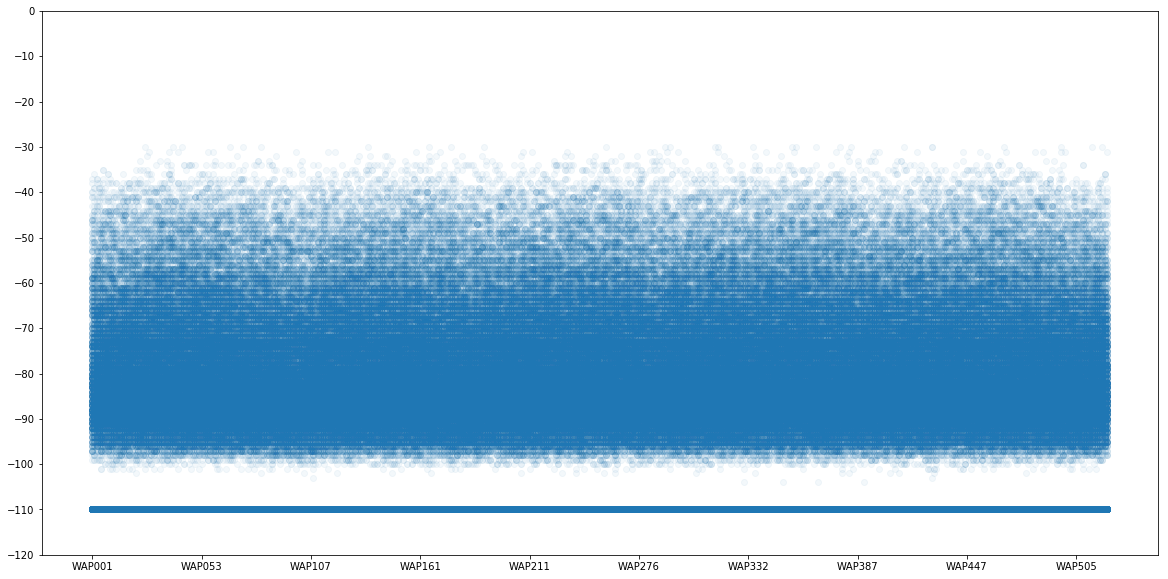

In [521]:
# visualise cleaned training data
from itertools import chain
f, (ax1) = plt.subplots(1, 1, sharey = True, figsize = (20, 10))
ax1 = plt.scatter( list(chain.from_iterable( [training_data_transposed.index.values[0:465].tolist()]*19445)), 
            training_data_transposed.iloc[0:465,0:19445], 
            alpha=0.05)
plt.xticks(np.arange(0, 465, step=50))
plt.yticks(np.arange(-120, 10, step=10))
plt.show()

This is how the training data looks like after removing the outliers and changing the value of undetected WAPs

In [522]:
# pandas quantile for indentifying outlier
(training_data.iloc[:, :-4].quantile(0.999)).max()

-35.0

In [523]:
# numpy quantile
np.quantile(training_data.iloc[:, :-4].values, 0.999)

-49.0

### Validation Data Set

In [524]:
# the weakest signal measurement in validation data set
validation_rawdata.iloc[:,:520].min().min()

-102

In [525]:
# substitute undetected WAPs through -110 in validation data set
validation_data = validation_rawdata.copy()
validation_data[validation_data.iloc[:, :520]==100] = -110

In [526]:
(validation_data.iloc[:, :520]==100).sum().sum()

0

In [527]:
(validation_rawdata.iloc[:, :520]==-110).sum().sum()

0

In [528]:
(validation_rawdata.iloc[:, :520]==100).sum().sum()

559416

In [529]:
(validation_data.iloc[:, :520]==-110).sum().sum()

559416

In [530]:
# highest signal strength
validation_data.iloc[:, :520].max().max()

-34

In [531]:
# lowest signal strength
validation_data.iloc[:, :520].min().min()

-110

In [532]:
# delete 0 variance features
validation_data =  validation_data.drop(zero_std_training[zero_std_training["zero_variance"] == True].index, axis=1)

In [533]:
# delete unused columns
validation_data = validation_data.drop(["SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"], axis=1)

# BuildingID Classification ####

I want to classify the BuildingID with signal strength

In [535]:
# copy data frame for building classifier
b_training = training_data.copy()
b_validation = validation_data.copy()

In [536]:
# delete columns excepts target and predictors
b_training = b_training.drop(["LONGITUDE", "LATITUDE", "FLOOR"], axis=1)
b_validation = b_validation.drop(["LONGITUDE", "LATITUDE", "FLOOR"], axis=1)

In [537]:
# train test split
from sklearn.model_selection import train_test_split

x = b_training.loc[:, b_training.columns != "BUILDINGID"]
y = b_training[["BUILDINGID"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.25)

In [539]:
# scaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaler.fit(x)
scaler.fit(x_train)

x_scaled = scaler.transform(x)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

warnings.filterwarnings('ignore')

I used min max scaler because it delivers better accuracy with neural network

In [540]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

b_knn = KNeighborsClassifier(n_neighbors=4)
b_knn.fit(x_train_scaled, y_train)

train_prediction_b_knn = b_knn.predict(x_train_scaled)
test_prediction_b_knn = b_knn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [541]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy KNN")
print(accuracy_score(y_train, train_prediction_b_knn))

print("test accuracy KNN")
print(accuracy_score(y_test, test_prediction_b_knn))

train accuracy KNN
0.9977370911335116
test accuracy KNN
0.9975318798848211


In [542]:
# Validation Prediction
x_b_validation = b_validation.loc[:, b_training.columns != "BUILDINGID"]
y_b_validation = b_validation[["BUILDINGID"]]

x_b_validation_scaled = scaler.transform(x_b_validation)

validation_prediction_b_knn = b_knn.predict(x_b_validation_scaled)

# Validation Accuracy KNN
from sklearn.metrics import accuracy_score

print("validation accuracy KNN")
print(accuracy_score(y_b_validation, validation_prediction_b_knn))

validation accuracy KNN
0.9945994599459946


In [543]:
# NN
from sklearn.neural_network import MLPClassifier
b_nn = MLPClassifier(hidden_layer_sizes=(100, ))

b_nn.fit(x_train_scaled, y_train)
train_prediction_b_nn = b_nn.predict(x_train_scaled)
test_prediction_b_nn = b_nn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [544]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy NN")
print(accuracy_score(y_train, train_prediction_b_nn))

print("test accuracy NN")
print(accuracy_score(y_test, test_prediction_b_nn))

train accuracy NN
0.9980113831173284
test accuracy NN
0.9979432332373509


In [545]:
# Validation Prediction NN
x_b_validation = b_validation.loc[:, b_training.columns != "BUILDINGID"]
y_b_validation = b_validation[["BUILDINGID"]]

x_b_validation_scaled = scaler.transform(x_b_validation)

validation_prediction_b_nn = b_nn.predict(x_b_validation_scaled)

# Validation Accuracy NN
from sklearn.metrics import accuracy_score

print("validation accuracy")
print(accuracy_score(y_b_validation, validation_prediction_b_nn))

validation accuracy
1.0


In [546]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

b_rf = RandomForestClassifier(criterion="entropy", max_features=50, n_estimators=100)
b_rf.fit(x_train, y_train)

train_prediction_b_rf = b_rf.predict(x_train)
test_prediction_b_rf = b_rf.predict(x_test)

warnings.filterwarnings('ignore')

In [547]:
# Random Forest Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy Random Forest")
print(accuracy_score(y_train, train_prediction_b_rf))
print("test accuracy Random Forest")
print(accuracy_score(y_test, test_prediction_b_rf))

train accuracy Random Forest
0.9981485291092368
test accuracy Random Forest
0.997737556561086


In [548]:
# Confusion Matrix Test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_prediction_b_rf)

array([[1323,    0,    1],
       [   0, 1285,   10],
       [   0,    0, 2243]])

In [549]:
print("Number of Observations in Buildind_0: {}".format((y_test["BUILDINGID"]==0).sum()))
print("Number of Observations in Buildind_1: {}".format((y_test["BUILDINGID"]==1).sum()))
print("Number of Observations in Buildind_2: {}".format((y_test["BUILDINGID"]==2).sum()))

Number of Observations in Buildind_0: 1324
Number of Observations in Buildind_1: 1295
Number of Observations in Buildind_2: 2243


In [550]:
# Validation Accuracy
from sklearn.metrics import accuracy_score

validation_prediction_b_rf = b_rf.predict(x_b_validation)

print("validation accuracy RF")
print(accuracy_score(y_b_validation, validation_prediction_b_rf))

validation accuracy RF
0.9981998199819982


In [551]:
# Confusion Matrix Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_b_validation, validation_prediction_b_rf)

array([[535,   0,   1],
       [  1, 306,   0],
       [  0,   0, 268]])

In [552]:
# validation prediction with probabilities
validation_prediction_b_rf_prob = b_rf.predict_proba(x_b_validation)
validation_prediction_b_rf_prob

array([[0.        , 0.62053588, 0.37946412],
       [0.        , 0.16      , 0.84      ],
       [0.        , 0.015     , 0.985     ],
       ...,
       [0.96      , 0.0187418 , 0.0212582 ],
       [1.        , 0.        , 0.        ],
       [0.98      , 0.0085037 , 0.0114963 ]])

([<matplotlib.axis.YTick at 0x1a1bd243c8>,
 <a list of 3 Text yticklabel objects>)

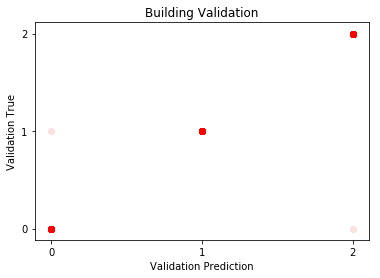

In [553]:
# plot building validation
plt.scatter(validation_prediction_b_rf, y_b_validation, alpha=0.1, c="red")
plt.title("Building Validation")
plt.xlabel("Validation Prediction")
plt.ylabel("Validation True")
plt.xticks(np.arange(0, 3, step=1))
plt.yticks(np.arange(0, 3, step=1))

### Gridsearch Building Classification Neural Network

In [557]:
# Gridsearch
from sklearn.model_selection import GridSearchCV

p_grid = {"hidden_layer_sizes" : [25, 50, 100, 150, 200]}
b_nn_gs = MLPClassifier()

gs_b_nn = GridSearchCV(estimator=b_nn_gs, param_grid=p_grid, cv=3, n_jobs=-1)



In [568]:
# train grid serach instance

gs_b_nn.fit(x_train_scaled, y_train)

warnings.filterwarnings('ignore')

In [569]:
# best model parameters
gs_b_nn.best_params_

{'hidden_layer_sizes': 150}

In [570]:
# best score achieved with grid search instance
gs_b_nn.best_score_

0.9980799561132826

In [571]:
gs_b_nn.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [572]:
# predictions with grid search instance
train_prediction_b_gs = gs_b_nn.predict(x_train_scaled)
test_prediction_b_gs = gs_b_nn.predict(x_test_scaled)

In [574]:
print("train accuracy GS NN")
print(gs_b_nn.score(x_train_scaled, y_train))
print("test accuracy GS NN")
print(gs_b_nn.score(x_test_scaled, y_test))

train accuracy GS NN
0.9980113831173284
test accuracy GS NN
0.9979432332373509


In [576]:
# validation prediction with grid search instance
x_b_validation_scaled = scaler.transform(x_b_validation)
validation_b_gs = gs_b_nn.predict(x_b_validation_scaled)

# Validation Accuracy
from sklearn.metrics import accuracy_score

print("validation accuracy GS RF")
print(accuracy_score(y_b_validation, validation_b_gs))

validation accuracy GS RF
1.0


In [577]:
# Confusion Matrix Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_b_validation, validation_b_gs)

array([[536,   0,   0],
       [  0, 307,   0],
       [  0,   0, 268]])

# Floor Classification ####

##  1. Approach: 1 Model for All 13 Classes of Building-Floor Pairs

In [578]:
# Copy Data Frame for Floor Classification
f13_training = training_data.copy()
f13_validation = validation_data.copy()

In [579]:
f13_training["floor_id"] = f13_training["FLOOR"].map(str) + "/" + f13_training["BUILDINGID"].map(str)
f13_validation["floor_id"] = f13_validation["FLOOR"].map(str) + "/" + f13_validation["BUILDINGID"].map(str)

In [580]:
# number of unique floor-building pairs
len(f13_validation["floor_id"].unique())

13

In [581]:
# Delete Columns excepts Target and Predictors
f13_training = f13_training.drop(["LONGITUDE", "LATITUDE", "FLOOR"], axis=1)
f13_validation = f13_validation.drop(["LONGITUDE", "LATITUDE", "FLOOR"], axis=1)

In [582]:
# Validation X, Y Sets
x_f13_validation = f13_validation.loc[:, f13_training.columns != "floor_id"]
y_f13_validation = f13_validation[["floor_id"]]

In [583]:
# Train Test Split
from sklearn.model_selection import train_test_split

x = f13_training.loc[:, f13_training.columns != "floor_id"]
y = f13_training[["floor_id"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.25)

In [584]:
# scaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaler.fit(x)
scaler.fit(x_train)

x_scaled = scaler.transform(x)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

warnings.filterwarnings('ignore')

In [585]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

f13_knn = KNeighborsClassifier(n_neighbors=4)
f13_knn.fit(x_train_scaled, y_train)

train_prediction_f13_knn = f13_knn.predict(x_train_scaled)
test_prediction_f13_knn = f13_knn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [586]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy KNN")
print(accuracy_score(y_train, train_prediction_f13_knn))

print("test accuracy KNN")
print(accuracy_score(y_test, test_prediction_f13_knn))

train accuracy KNN
0.9973942261537406
test accuracy KNN
0.9938296997120527


In [587]:
# Validation Prediction
x_f13_validation_scaled = scaler.transform(x_f13_validation)

validation_prediction_f13_knn = f13_knn.predict(x_f13_validation_scaled)

# Validation Accuracy KNN
from sklearn.metrics import accuracy_score

print("validation accuracy KNN")
print(accuracy_score(y_f13_validation, validation_prediction_f13_knn))

validation accuracy KNN
0.8703870387038704


In [588]:
# NN
from sklearn.neural_network import MLPClassifier
f13_nn = MLPClassifier(hidden_layer_sizes=(200, ))

f13_nn.fit(x_train_scaled, y_train)
train_prediction_f13_nn = f13_nn.predict(x_train_scaled)
test_prediction_f13_nn = f13_nn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [589]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy NN")
print(accuracy_score(y_train, train_prediction_f13_nn))

print("test accuracy NN")
print(accuracy_score(y_test, test_prediction_f13_nn))

train accuracy NN
0.9998628540080916
test accuracy NN
0.9962978198272316


In [590]:
# Validation Prediction NN
x_f13_validation_scaled = scaler.transform(x_f13_validation)

validation_prediction_f13_nn = f13_nn.predict(x_f13_validation_scaled)

# Validation Accuracy NN
from sklearn.metrics import accuracy_score

print("validation accuracy")
print(accuracy_score(y_f13_validation, validation_prediction_f13_nn))

validation accuracy
0.9108910891089109


In [591]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

f13_rf = RandomForestClassifier(criterion="entropy", max_features=100, n_estimators=100)
f13_rf.fit(x_train, y_train)

train_prediction_f13_rf = f13_rf.predict(x_train)
test_prediction_f13_rf = f13_rf.predict(x_test)

warnings.filterwarnings('ignore')

In [592]:
# Random Forest Train Test Accuracy
print("train accuracy RF")
print(accuracy_score(y_train, train_prediction_f13_rf))
print("test accuracy RF")
print(accuracy_score(y_test, test_prediction_f13_rf))

train accuracy RF
0.9998628540080916
test accuracy RF
0.9983545865898807


In [593]:
# Confusion Matrix Test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_prediction_f13_rf)

array([[263,   0,   0,   3,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0, 347,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 505,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0, 340,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 376,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0, 494,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 365,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 343,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 376,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 350,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 229,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 640,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 226]])

In [594]:
# Random Forest Validation
validation_prediction_f13_rf = f13_rf.predict(x_f13_validation)

print("validation accuracy RF")
print(accuracy_score(y_f13_validation, validation_prediction_f13_rf))

validation accuracy RF
0.9036903690369037


In [595]:
# Confusion Matrix Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_f13_validation, validation_prediction_f13_rf)

array([[ 72,   0,   0,   2,   0,   0,   4,   0,   0,   0,   0,   0,   0],
       [  0,  24,   0,   0,   1,   0,   0,   4,   0,   0,   1,   0,   0],
       [  0,   0,  21,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0, 203,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,  95,   0,   0,  43,   0,   0,   4,   0,   0],
       [  0,   0,   0,   0,   0, 109,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   3,   0,   0, 161,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  83,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  48,   0,   0,   6,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,   0,  81,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,   0,   0,  41,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,   1],
       [  0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,  10,  27]])

## 2. Approach: 1 Model for All Buildings

In [596]:
# Copy Data Frame for Floor Classification
f_training = training_data.copy()
f_validation = validation_data.copy()

In [597]:
# Delete Columns excepts Target and Predictors
f_training = f_training.drop(["LONGITUDE", "LATITUDE"], axis=1)
f_validation = f_validation.drop(["LONGITUDE", "LATITUDE"], axis=1)

In [598]:
# Validation X, Y Sets
x_f_validation = f_validation.loc[:, f_training.columns != "FLOOR"]
y_f_validation = f_validation[["FLOOR"]]

In [599]:
# Train Test Split
from sklearn.model_selection import train_test_split

x = f_training.loc[:, f_training.columns != "FLOOR"]
y = f_training[["FLOOR"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.25)

In [600]:
# Scaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaler.fit(x)
scaler.fit(x_train)

x_scaled = scaler.transform(x)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

warnings.filterwarnings('ignore')

In [601]:
# NN
from sklearn.neural_network import MLPClassifier
f_nn = MLPClassifier(hidden_layer_sizes=(200, ))

f_nn.fit(x_train_scaled, y_train)
train_prediction_f_nn = f_nn.predict(x_train_scaled)
test_prediction_f_nn = f_nn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [602]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy NN")
print(accuracy_score(y_train, train_prediction_f_nn))

print("test accuracy NN")
print(accuracy_score(y_test, test_prediction_f_nn))

train accuracy NN
0.9998628540080916
test accuracy NN
0.995475113122172


In [603]:
# Validation Prediction NN
x_f_validation_scaled = scaler.transform(x_f_validation)

validation_prediction_f_nn = f_nn.predict(x_f_validation_scaled)

# Validation Accuracy NN
from sklearn.metrics import accuracy_score

print("validation accuracy")
print(accuracy_score(y_f_validation, validation_prediction_f_nn))

validation accuracy
0.90999099909991


In [604]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

f_knn = KNeighborsClassifier(n_neighbors=4)
f_knn.fit(x_train_scaled, y_train)

train_prediction_f_knn = f_knn.predict(x_train_scaled)
test_prediction_f_knn = f_knn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [605]:
# KNN Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy KNN")
print(accuracy_score(y_train, train_prediction_f_knn))
print("test accuracy KNN")
print(accuracy_score(y_test, test_prediction_f_knn))

train accuracy KNN
0.9973942261537406
test accuracy KNN
0.9938296997120527


In [606]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

f_dt = DecisionTreeClassifier(criterion="entropy")
f_dt.fit(x_train, y_train)

train_prediction_f_dt = f_dt.predict(x_train)
test_prediction_f_dt = f_dt.predict(x_test)

print("train accuracy")
print(f_dt.score(x_train, y_train))
print("test accuracy")
print(f_dt.score(x_test, y_test))

train accuracy
0.9998628540080916
test accuracy
0.9757301522007404


In [607]:
# Decision Tree Train Test Accuracy
print("train accuracy")
print(accuracy_score(y_train, train_prediction_f_dt))
print("test accuracy")
print(accuracy_score(y_test, test_prediction_f_dt))

train accuracy
0.9998628540080916
test accuracy
0.9757301522007404


In [608]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

f_rf = RandomForestClassifier(criterion="entropy", max_features=100, n_estimators=100)
f_rf.fit(x_train, y_train)

train_prediction_f_rf = f_rf.predict(x_train)
test_prediction_f_rf = f_rf.predict(x_test)

warnings.filterwarnings('ignore')

In [609]:
# Random Forest Train Test Accuracy
print("train accuracy")
print(accuracy_score(y_train, train_prediction_f_rf))
print("test accuracy")
print(accuracy_score(y_test, test_prediction_f_rf))

train accuracy
0.9998628540080916
test accuracy
0.9979432332373509


In [610]:
# Confusion Matrix Test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_prediction_f_rf)

array([[1115,    3,    0,    1,    0],
       [   3, 1210,    1,    0,    0],
       [   0,    1, 1082,    1,    0],
       [   0,    0,    0, 1219,    0],
       [   0,    0,    0,    0,  226]])

In [611]:
# KNN Validation
x_f_validation_scaled = scaler.transform(x_f_validation)

validation_prediction_f_knn = f_knn.predict(x_f_validation_scaled)

print("validation accuracy KNN")
print(accuracy_score(y_f_validation, validation_prediction_f_knn))

validation accuracy KNN
0.8703870387038704


In [612]:
# Decision Tree Validation
validation_prediction_f_dt = f_dt.predict(x_f_validation)

print("validation accuracy DT")
print(accuracy_score(y_f_validation, validation_prediction_f_dt))

validation accuracy DT
0.8010801080108011


In [613]:
# Random Forest Validation
validation_prediction_f_rf = f_rf.predict(x_f_validation)

print("validation accuracy RF")
print(accuracy_score(y_f_validation, validation_prediction_f_rf))

validation accuracy RF
0.9018901890189019


In [614]:
# Confusion Matrix Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_f_validation, validation_prediction_f_rf)

array([[115,   9,   5,   3,   0],
       [  4, 408,  42,   8,   0],
       [  0,   6, 286,  14,   0],
       [  0,   0,   7, 163,   2],
       [  2,   0,   0,   7,  30]])

In [615]:
# NN
from sklearn.neural_network import MLPClassifier
f_nn = MLPClassifier(hidden_layer_sizes=(375, ))

f_nn.fit(x_train, y_train)
train_prediction_f_nn = f_nn.predict(x_train)
test_prediction_f_nn = f_nn.predict(x_test)

warnings.filterwarnings('ignore')

In [616]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy NN")
print(accuracy_score(y_train, train_prediction_f_nn))

print("test accuracy NN")
print(accuracy_score(y_test, test_prediction_f_nn))

train accuracy NN
0.8167729548103957
test accuracy NN
0.8107774578362814


In [617]:
# Validation Prediction NN
validation_prediction_f_nn = f_nn.predict(x_f_validation)

# Validation Accuracy NN
from sklearn.metrics import accuracy_score

print("validation accuracy")
print(accuracy_score(y_f_validation, validation_prediction_f_nn))

validation accuracy
0.6597659765976598


## 3. Approach: Separate Model for Each Building

### BuildingID: 0

In [618]:
# Copy Data Frame for Floor Classification
f_b0_training = training_data.copy()
f_b0_validation = validation_data.copy()

In [619]:
# Only BuildingID 0 Data Sets
f_b0_training = f_b0_training[f_b0_training["BUILDINGID"] == 0]
f_b0_validation = f_b0_validation[f_b0_validation["BUILDINGID"] == 0]

In [620]:
# Delete Columns excepts Target and Predictors
f_b0_training = f_b0_training.drop(["LONGITUDE", "LATITUDE"], axis=1)
f_b0_validation = f_b0_validation.drop(["LONGITUDE", "LATITUDE"], axis=1)

In [621]:
# Train Test Split
from sklearn.model_selection import train_test_split

x = f_b0_training.loc[:, f_b0_training.columns != "FLOOR"]
y = f_b0_training[["FLOOR"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.25)

In [622]:
# Validation X, Y Sets
x_f_b0_validation = f_b0_validation.loc[:, f_b0_training.columns != "FLOOR"]
y_f_b0_validation = f_b0_validation[["FLOOR"]]

In [623]:
# Scaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaler.fit(x)
scaler.fit(x_train)

x_scaled = scaler.transform(x)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

warnings.filterwarnings('ignore')

In [624]:
# NN
from sklearn.neural_network import MLPClassifier
f_b0_nn = MLPClassifier(hidden_layer_sizes=(350, ))

f_b0_nn.fit(x_train_scaled, y_train)
train_prediction_f_b0_nn = f_b0_nn.predict(x_train_scaled)
test_prediction_f_b0_nn = f_b0_nn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [625]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy NN")
print(accuracy_score(y_train, train_prediction_f_b0_nn))

print("test accuracy NN")
print(accuracy_score(y_test, test_prediction_f_b0_nn))

train accuracy NN
1.0
test accuracy NN
0.9961890243902439


In [626]:
# Validation Prediction NN
x_f_b0_validation_scaled = scaler.transform(x_f_b0_validation)

validation_prediction_f_b0_nn = f_b0_nn.predict(x_f_b0_validation_scaled)

# Validation Accuracy NN
from sklearn.metrics import accuracy_score

print("validation accuracy")
print(accuracy_score(y_f_b0_validation, validation_prediction_f_b0_nn))

validation accuracy
0.9589552238805971


In [627]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

f_b0_knn = KNeighborsClassifier(n_neighbors=4)
f_b0_knn.fit(x_train_scaled, y_train)

train_prediction_f_b0_knn = f_b0_knn.predict(x_train_scaled)
test_prediction_f_b0_knn = f_b0_knn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [628]:
# KNN Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy KNN")
print(accuracy_score(y_train, train_prediction_f_b0_knn))
print("test accuracy KNN")
print(accuracy_score(y_test, test_prediction_f_b0_knn))

train accuracy KNN
0.9949186991869918
test accuracy KNN
0.9916158536585366


In [629]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

f_b0_dt = DecisionTreeClassifier(criterion="entropy")
f_b0_dt.fit(x_train, y_train)

train_prediction_f_b0_dt = f_b0_dt.predict(x_train)
test_prediction_f_b0_dt = f_b0_dt.predict(x_test)

print("train accuracy")
print(f_b0_dt.score(x_train, y_train))
print("test accuracy")
print(f_b0_dt.score(x_test, y_test))

train accuracy
1.0
test accuracy
0.9717987804878049


In [630]:
# Decision Tree Train Test Accuracy
print("train accuracy DT")
print(accuracy_score(y_train, train_prediction_f_b0_dt))
print("test accuracy DT")
print(accuracy_score(y_test, test_prediction_f_b0_dt))

train accuracy DT
1.0
test accuracy DT
0.9717987804878049


In [631]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

f_b0_rf = RandomForestClassifier(criterion="entropy", max_features=100, n_estimators=100)
f_b0_rf.fit(x_train, y_train)

train_prediction_f_b0_rf = f_b0_rf.predict(x_train)
test_prediction_f_b0_rf = f_b0_rf.predict(x_test)

warnings.filterwarnings('ignore')

In [632]:
# Random Forest Train Test Accuracy
print("train accuracy RF")
print(accuracy_score(y_train, train_prediction_f_b0_rf))
print("test accuracy RF")
print(accuracy_score(y_test, test_prediction_f_b0_rf))

train accuracy RF
1.0
test accuracy RF
0.9961890243902439


In [633]:
# Confusion Matrix Test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_prediction_f_b0_rf)

array([[267,   4,   0,   0],
       [  1, 348,   0,   0],
       [  0,   0, 333,   0],
       [  0,   0,   0, 359]])

In [634]:
# KNN Validation
x_f_b0_validation_scaled = scaler.transform(x_f_b0_validation)

validation_prediction_f_b0_knn = f_b0_knn.predict(x_f_b0_validation_scaled)

print("validation accuracy KNN")
print(accuracy_score(y_f_b0_validation, validation_prediction_f_b0_knn))

validation accuracy KNN
0.9309701492537313


In [635]:
# Decision Tree Validation
validation_prediction_f_b0_dt = f_b0_dt.predict(x_f_b0_validation)

print("validation accuracy DT")
print(accuracy_score(y_f_b0_validation, validation_prediction_f_b0_dt))

validation accuracy DT
0.8376865671641791


In [636]:
# Random Forest Validation
validation_prediction_f_b0_rf = f_b0_rf.predict(x_f_b0_validation)

print("validation accuracy RF")
print(accuracy_score(y_f_b0_validation, validation_prediction_f_b0_rf))

validation accuracy RF
0.9682835820895522


In [637]:
# Confusion Matrix Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_f_b0_validation, validation_prediction_f_b0_rf)

array([[ 73,   3,   2,   0],
       [  3, 203,   2,   0],
       [  0,   4, 160,   1],
       [  0,   0,   2,  83]])

([<matplotlib.axis.YTick at 0x1a40fbd5c0>,
 <a list of 3 Text yticklabel objects>)

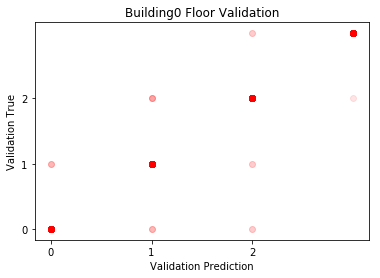

In [638]:
# plot floor validation
plt.scatter(validation_prediction_f_b0_rf, y_f_b0_validation, alpha=0.1, c="red")
plt.title("Building0 Floor Validation")
plt.xlabel("Validation Prediction")
plt.ylabel("Validation True")
plt.xticks(np.arange(0, 3, step=1))
plt.yticks(np.arange(0, 3, step=1))

### BuildingID: 1

In [639]:
# Copy Data Frame for Floor Classification
f_b1_training = training_data.copy()
f_b1_validation = validation_data.copy()

In [640]:
# Only BuildingID 1 Data Sets
f_b1_training = f_b1_training[f_b1_training["BUILDINGID"] == 1]
f_b1_validation = f_b1_validation[f_b1_validation["BUILDINGID"] == 1]

In [641]:
# Delete Columns excepts Target and Predictors
f_b1_training = f_b1_training.drop(["LONGITUDE", "LATITUDE"], axis=1)
f_b1_validation = f_b1_validation.drop(["LONGITUDE", "LATITUDE"], axis=1)

In [642]:
# Validation X, Y Sets
x_f_b1_validation = f_b1_validation.loc[:, f_b1_training.columns != "FLOOR"]
y_f_b1_validation = f_b1_validation[["FLOOR"]]

In [643]:
# Train Test Split
from sklearn.model_selection import train_test_split

x = f_b1_training.loc[:, f_b1_training.columns != "FLOOR"]
y = f_b1_training[["FLOOR"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.25)

In [644]:
# Scaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaler.fit(x)
scaler.fit(x_train)

x_scaled = scaler.transform(x)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

warnings.filterwarnings('ignore')

In [645]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

f_b1_knn = KNeighborsClassifier(n_neighbors=4)
f_b1_knn.fit(x_train_scaled, y_train)

train_prediction_f_b1_knn = f_b1_knn.predict(x_train_scaled)
test_prediction_f_b1_knn = f_b1_knn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [646]:
# KNN Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy KNN")
print(accuracy_score(y_train, train_prediction_f_b1_knn))
print("test accuracy KNN")
print(accuracy_score(y_test, test_prediction_f_b1_knn))

train accuracy KNN
0.9984579799537394
test accuracy KNN
0.9969159599074788


In [647]:
# KNN Validation
x_f_b1_validation_scaled = scaler.transform(x_f_b1_validation)

validation_prediction_f_b1_knn = f_b1_knn.predict(x_f_b1_validation_scaled)

print("validation accuracy KNN")
print(accuracy_score(y_f_b1_validation, validation_prediction_f_b1_knn))

validation accuracy KNN
0.752442996742671


In [648]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

f_b1_rf = RandomForestClassifier(criterion="entropy", max_features=50, n_estimators=250)
f_b1_rf.fit(x_train, y_train)

train_prediction_f_b1_rf = f_b1_rf.predict(x_train)
test_prediction_f_b1_rf = f_b1_rf.predict(x_test)

warnings.filterwarnings('ignore')

In [649]:
# Random Forest Train Test Accuracy
print("train accuracy")
print(accuracy_score(y_train, train_prediction_f_b1_rf))
print("test accuracy")
print(accuracy_score(y_test, test_prediction_f_b1_rf))

train accuracy
1.0
test accuracy
0.9984579799537394


In [650]:
# Confusion Matrix Test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_prediction_f_b1_rf)

array([[348,   0,   0,   0],
       [  1, 356,   0,   0],
       [  0,   0, 345,   0],
       [  0,   0,   1, 246]])

In [651]:
# Random Forest Validation
validation_prediction_f_b1_rf = f_b1_rf.predict(x_f_b1_validation)

print("validation accuracy")
print(accuracy_score(y_f_b1_validation, validation_prediction_f_b1_rf))

validation accuracy
0.7915309446254072


In [652]:
# Confusion Matrix Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_f_b1_validation, validation_prediction_f_b1_rf)

array([[21,  4,  4,  1],
       [ 1, 97, 42,  3],
       [ 0,  1, 83,  3],
       [ 0,  0,  5, 42]])

([<matplotlib.axis.YTick at 0x1a177d29e8>,
 <a list of 3 Text yticklabel objects>)

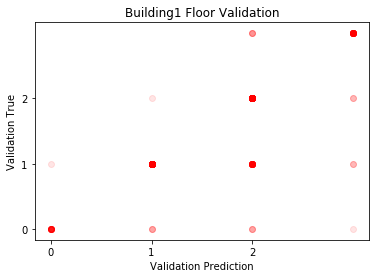

In [653]:
# plot floor validation
plt.scatter(validation_prediction_f_b1_rf, y_f_b1_validation, alpha=0.1, c="red")
plt.title("Building1 Floor Validation")
plt.xlabel("Validation Prediction")
plt.ylabel("Validation True")
plt.xticks(np.arange(0, 3, step=1))
plt.yticks(np.arange(0, 3, step=1))

In [654]:
# NN
from sklearn.neural_network import MLPClassifier
f_b1_nn = MLPClassifier(hidden_layer_sizes=(300, ))
f_b1_nn.fit(x_train_scaled, y_train)
train_prediction_f_b1_nn = f_b1_nn.predict(x_train_scaled)
test_prediction_f_b1_nn = f_b1_nn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [655]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy NN")
print(accuracy_score(y_train, train_prediction_f_b1_nn))

print("test accuracy NN")
print(accuracy_score(y_test, test_prediction_f_b1_nn))

train accuracy NN
1.0
test accuracy NN
0.9976869699306091


In [656]:
# Validation Prediction
x_f_b1_validation_scaled = scaler.transform(x_f_b1_validation)
validation_prediction_f_b1_nn = f_b1_nn.predict(x_f_b1_validation_scaled)
# Validation Accuracy NN
from sklearn.metrics import accuracy_score

print("validation accuracy")
print(accuracy_score(y_f_b1_validation, validation_prediction_f_b1_nn))

validation accuracy
0.8110749185667753


### BuildingID: 2

In [657]:
# Copy Data Frame for Floor Classification
f_b2_training = training_data.copy()
f_b2_validation = validation_data.copy()

In [658]:
# Only BuildingID 2 Data Sets
f_b2_training = f_b2_training[f_b2_training["BUILDINGID"] == 2]
f_b2_validation = f_b2_validation[f_b2_validation["BUILDINGID"] == 2]

In [659]:
# Delete Columns excepts Target and Predictors
f_b2_training = f_b2_training.drop(["LONGITUDE", "LATITUDE"], axis=1)
f_b2_validation = f_b2_validation.drop(["LONGITUDE", "LATITUDE"], axis=1)

In [660]:
# Validation X, Y Sets
x_f_b2_validation = f_b2_validation.loc[:, f_b2_training.columns != "FLOOR"]
y_f_b2_validation = f_b2_validation[["FLOOR"]]

In [661]:
# Train Test Split
from sklearn.model_selection import train_test_split

x = f_b2_training.loc[:, f_b2_training.columns != "FLOOR"]
y = f_b2_training[["FLOOR"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.25)

In [662]:
# Scaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaler.fit(x)
scaler.fit(x_train)

x_scaled = scaler.transform(x)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

warnings.filterwarnings('ignore')

In [663]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

f_b2_knn = KNeighborsClassifier(n_neighbors=4)
f_b2_knn.fit(x_train_scaled, y_train)

train_prediction_f_b2_knn = f_b2_knn.predict(x_train_scaled)
test_prediction_f_b2_knn = f_b2_knn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [664]:
# KNN Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy KNN")
print(accuracy_score(y_train, train_prediction_f_b2_knn))
print("test accuracy KNN")
print(accuracy_score(y_test, test_prediction_f_b2_knn))

train accuracy KNN
0.9968916518650088
test accuracy KNN
0.9951176209498447


In [665]:
# KNN Validation
x_f_b2_validation_scaled = scaler.transform(x_f_b2_validation)

validation_prediction_f_b2_knn = f_b2_knn.predict(x_f_b2_validation_scaled)

print("validation accuracy KNN")
print(accuracy_score(y_f_b2_validation, validation_prediction_f_b2_knn))

validation accuracy KNN
0.8582089552238806


In [666]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

f_b2_rf = RandomForestClassifier(criterion="entropy", max_features=50, n_estimators=100)
f_b2_rf.fit(x_train, y_train)

train_prediction_f_b2_rf = f_b2_rf.predict(x_train)
test_prediction_f_b2_rf = f_b2_rf.predict(x_test)

warnings.filterwarnings('ignore')

In [667]:
# Random Forest Train Test Accuracy
print("train accuracy")
print(accuracy_score(y_train, train_prediction_f_b2_rf))
print("test accuracy")
print(accuracy_score(y_test, test_prediction_f_b2_rf))

train accuracy
0.9997039668442865
test accuracy
0.9977807367953839


In [668]:
# Confusion Matrix Test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_prediction_f_b2_rf)

array([[482,   0,   0,   0,   0],
       [  0, 548,   0,   0,   0],
       [  0,   2, 381,   2,   0],
       [  0,   0,   0, 614,   0],
       [  0,   0,   0,   1, 223]])

In [669]:
# Random Forest Validation
validation_prediction_f_b2_rf = f_b2_rf.predict(x_f_b2_validation)

print("validation accuracy")
print(accuracy_score(y_f_b2_validation, validation_prediction_f_b2_rf))

validation accuracy
0.9029850746268657


In [670]:
# Confusion Matrix Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_f_b2_validation, validation_prediction_f_b2_rf)

array([[ 21,   3,   0,   0,   0],
       [  1, 107,   3,   0,   0],
       [  0,   2,  47,   5,   0],
       [  0,   0,   0,  38,   2],
       [  2,   0,   0,   8,  29]])

([<matplotlib.axis.YTick at 0x1a3d70be80>,
 <a list of 4 Text yticklabel objects>)

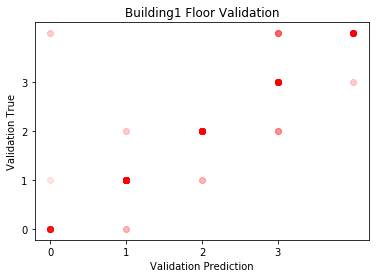

In [671]:
# plot floor validation
plt.scatter(validation_prediction_f_b2_rf, y_f_b2_validation, alpha=0.1, c="red")
plt.title("Building1 Floor Validation")
plt.xlabel("Validation Prediction")
plt.ylabel("Validation True")
plt.xticks(np.arange(0, 4, step=1))
plt.yticks(np.arange(0, 4, step=1))

In [672]:
# NN
from sklearn.neural_network import MLPClassifier
f_b2_nn = MLPClassifier(hidden_layer_sizes=(300, ))
f_b2_nn.fit(x_train_scaled, y_train)
train_prediction_f_b2_nn = f_b2_nn.predict(x_train_scaled)
test_prediction_f_b2_nn = f_b2_nn.predict(x_test_scaled)

warnings.filterwarnings('ignore')

In [673]:
x_train_scaled.max()

1.0000000000000004

In [674]:
# Train Test Accuracy
from sklearn.metrics import accuracy_score

print("train accuracy NN")
print(accuracy_score(y_train, train_prediction_f_b2_nn))

print("test accuracy NN")
print(accuracy_score(y_test, test_prediction_f_b2_nn))

train accuracy NN
0.9997039668442865
test accuracy NN
0.9951176209498447


In [675]:
# Validation Prediction
x_f_b2_validation_scaled = scaler.transform(x_f_b2_validation)
validation_prediction_f_b2_nn = f_b2_nn.predict(x_f_b2_validation_scaled)
# Validation Accuracy NN
from sklearn.metrics import accuracy_score

print("validation accuracy")
print(accuracy_score(y_f_b2_validation, validation_prediction_f_b2_nn))

validation accuracy
0.9402985074626866


##  Grid Search for Floor Classififcation

In [676]:
# Random Forest for floor classification
from sklearn.ensemble import RandomForestClassifier

# Gridsearch
from sklearn.model_selection import GridSearchCV
#cv = RepeatedKFold(n_splits=5, n_repeats=10)
p_grid = {"max_features" : [50, 100, 150], "n_estimators" : [50, 100, 150]}
rf_gs = RandomForestClassifier()
gs_rf = GridSearchCV(estimator=rf_gs, param_grid=p_grid, cv=3, n_jobs=-1)

In [677]:
gs_rf.fit(x_train, y_train)

warnings.filterwarnings('ignore')

In [678]:
gs_rf.best_params_

{'max_features': 100, 'n_estimators': 100}

In [679]:
gs_rf.best_score_

0.9982238010657194

In [680]:
gs_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [681]:
train_prediction_gs_rf = gs_rf.predict(x_train)
test_prediction_gs_rf = gs_rf.predict(x_test)

In [682]:
print("train accuracy")
print(gs_rf.score(x_train, y_train))
print("test accuracy")
print(gs_rf.score(x_test, y_test))

train accuracy
0.9997039668442865
test accuracy
0.9968930315135375


In [683]:
# validation prediction
validation_gs_rf = gs_rf.predict(x_f_b2_validation)

# Validation Accuracy
from sklearn.metrics import accuracy_score

print("validation accuracy")
print(accuracy_score(y_f_b2_validation, validation_gs_rf))

validation accuracy
0.8992537313432836


In [684]:
# Confusion Matrix Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_f_b2_validation, validation_gs_rf)

array([[ 22,   2,   0,   0,   0],
       [  1, 107,   3,   0,   0],
       [  0,   2,  45,   7,   0],
       [  0,   0,   0,  39,   1],
       [  2,   0,   0,   9,  28]])

# Longtitude Regression ####

In [685]:
# copy data frame for Longtitude regression
long_training = training_data.copy()
long_validation = validation_data.copy()

In [686]:
# delete columns excepts target and predictors
long_training = long_training.drop(["LATITUDE", "FLOOR"], axis=1)
long_validation = long_validation.drop(["LATITUDE", "FLOOR"], axis=1)

In [687]:
# train test split
from sklearn.model_selection import train_test_split

x = long_training.loc[:, long_training.columns != "LONGITUDE"]
y = long_training[["LONGITUDE"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.25)

In [688]:
# Validation X, Y Sets
x_long_validation = long_validation.loc[:, long_validation.columns != "LONGITUDE"]
y_long_validation = long_validation[["LONGITUDE"]]

In [689]:
# Scaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaler.fit(x)
scaler.fit(x_train)

x_scaled = scaler.transform(x)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

warnings.filterwarnings('ignore')

In [690]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
long_knn = KNeighborsRegressor(n_neighbors=4)
long_knn.fit(x_train_scaled, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [691]:
train_prediction_long_knn = long_knn.predict(x_train_scaled)
test_prediction_long_knn = long_knn.predict(x_test_scaled)

In [692]:
# R2
from sklearn.metrics import r2_score
print("train prediction R2")
print(r2_score(y_train, train_prediction_long_knn))
print("test prediction R2")
print(r2_score(y_test, test_prediction_long_knn))

train prediction R2
0.9989661007675004
test prediction R2
0.9984019758409508


In [693]:
# KNN Validation
x_long_validation_scaled = scaler.transform(x_long_validation)
validation_prediction_long_knn = long_knn.predict(x_long_validation_scaled)

print("validation R2")
print(r2_score(y_long_validation, validation_prediction_long_knn))

validation R2
0.9934551890029814


In [694]:
# model instances
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

long_rf = RandomForestRegressor(max_features=50, min_samples_split=4, n_estimators=100, min_samples_leaf=2)

#gb = GradientBoostingRegressor(loss='quantile', learning_rate=0.0001, n_estimators=50, max_features='log2', min_samples_split=2, max_depth=1)

In [695]:
# train model
long_rf.fit(x_train, y_train)

train_prediction_long_rf = long_rf.predict(x_train)
test_prediction_long_rf = long_rf.predict(x_test)

warnings.filterwarnings('ignore')

In [696]:
# R2
from sklearn.metrics import r2_score
print("train prediction R2")
print(r2_score(y_train, train_prediction_long_rf))
print("test prediction R2")
print(r2_score(y_test, test_prediction_long_rf))

train prediction R2
0.9990566975767285
test prediction R2
0.9982033155042495


In [697]:
# R2 alternative train
long_rf.score(x_train, y_train)

0.9990566975767285

In [698]:
# R2 alternative test
long_rf.score(x_test, y_test)

0.9982033155042496

In [699]:
# Random Forest Validation
validation_prediction_long_rf = long_rf.predict(x_long_validation)

print("validation R2")
print(r2_score(y_long_validation, validation_prediction_long_rf))

validation R2
0.9946246169142576


# Latitude Regression ####

In [700]:
# copy data frame for Longtitude regression
lat_training = training_data.copy()
lat_validation = validation_data.copy()

In [701]:
# delete columns excepts target and predictors
lat_training = lat_training.drop(["LONGITUDE", "FLOOR"], axis=1)
lat_validation = lat_validation.drop(["LONGITUDE", "FLOOR"], axis=1)

In [702]:
# train test split
from sklearn.model_selection import train_test_split

x = lat_training.loc[:, lat_training.columns != "LATITUDE"]
y = lat_training[["LATITUDE"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=34, test_size=0.25)

In [703]:
# Validation X, Y Sets
x_lat_validation = lat_validation.loc[:, lat_validation.columns != "LATITUDE"]
y_lat_validation = lat_validation[["LATITUDE"]]

In [704]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
lat_knn = KNeighborsRegressor(n_neighbors=4)
lat_knn.fit(x_train_scaled, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [705]:
train_prediction_lat_knn = lat_knn.predict(x_train_scaled)
test_prediction_lat_knn = lat_knn.predict(x_test_scaled)

In [706]:
# R2
from sklearn.metrics import r2_score
print("train prediction R2")
print(r2_score(y_train, train_prediction_lat_knn))
print("test prediction R2")
print(r2_score(y_test, test_prediction_lat_knn))

train prediction R2
0.9971347083326776
test prediction R2
0.9957935743505922


In [707]:
# KNN Validation
x_lat_validation_scaled = scaler.transform(x_lat_validation)
validation_prediction_lat_knn = lat_knn.predict(x_lat_validation_scaled)

print("validation R2")
print(r2_score(y_lat_validation, validation_prediction_lat_knn))

validation R2
0.9764540021884887


In [708]:
# model instances
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

lat_rf = RandomForestRegressor(max_features=50, min_samples_split=4, n_estimators=100, min_samples_leaf=2)


#gb = GradientBoostingRegressor(loss='quantile', learning_rate=0.0001, n_estimators=50, max_features='log2', min_samples_split=2, max_depth=1)

In [709]:
# train model
lat_rf.fit(x_train, y_train)

train_prediction_lat_rf = lat_rf.predict(x_train)
test_prediction_lat_rf = lat_rf.predict(x_test)

warnings.filterwarnings('ignore')

In [710]:
# R2
from sklearn.metrics import r2_score
print("train prediction R2")
print(r2_score(y_train, train_prediction_lat_rf))
print("test prediction R2")
print(r2_score(y_test, test_prediction_lat_rf))

train prediction R2
0.9979187798980615
test prediction R2
0.9959751480356689


In [711]:
# R2 alternative train
lat_rf.score(x_train, y_train)

0.9979187798980615

In [712]:
# R2 alternative test
lat_rf.score(x_test, y_test)

0.995975148035669

In [713]:
# Random Forest Validation
validation_prediction_lat_rf = lat_rf.predict(x_lat_validation)

print("validation R2")
print(r2_score(y_lat_validation, validation_prediction_lat_rf))

validation R2
0.9836346007354667


Text(0, 0.5, 'Latitude')

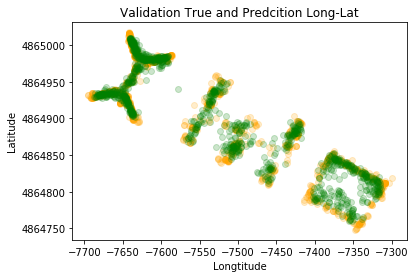

In [714]:
# plot validation
plt.scatter(validation_rawdata["LONGITUDE"], validation_rawdata["LATITUDE"], alpha=0.2, c="orange")

plt.scatter(validation_prediction_long_rf, validation_prediction_lat_rf, alpha=0.2, c="green")

plt.title("Validation True and Predcition Long-Lat")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")

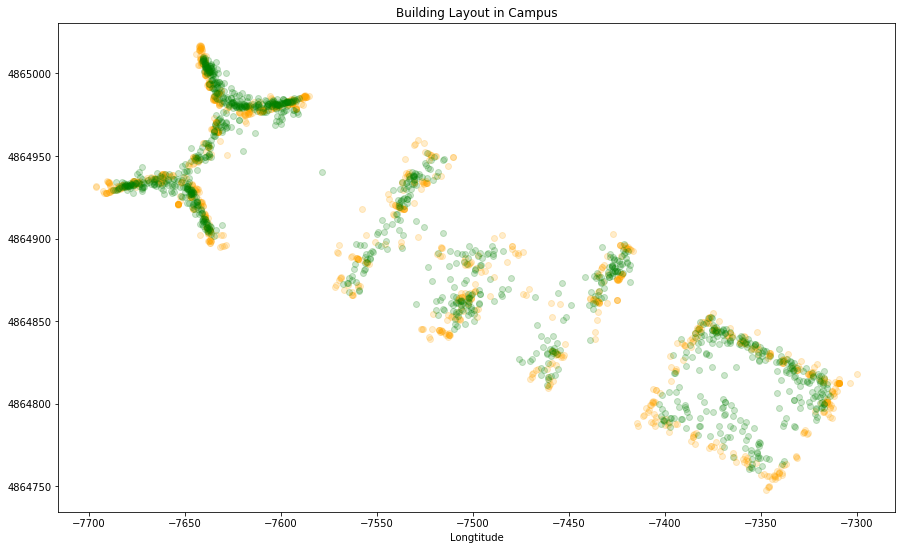

In [715]:
# plot validation
f, (ax5) = plt.subplots(1, 1, sharey = True, figsize = (15, 9))
ax5.scatter(validation_rawdata["LONGITUDE"], validation_rawdata["LATITUDE"], alpha=0.2, c="orange")
ax5.scatter(validation_prediction_long_rf, validation_prediction_lat_rf, alpha=0.2, c="green")
ax5.set_title("Building Layout in Campus")
ax5.set_xlabel("Longtitude")
plt.show()

# Saving and Loading Models #### 

In [716]:
from sklearn.externals import joblib

 
# Output a pickle file for the model
#joblib.dump(b_rf, 'saved_b_rf_1.pkl')

joblib.dump(b_rf, '/Users/hasanyigitdereobali/Downloads/saved_b_rf_1.pkl')

['/Users/hasanyigitdereobali/Downloads/saved_b_rf_1.pkl']

In [717]:
# Load the pickle file
#clf_load1 = joblib.load('saved_b_rf_1.pkl') 

clf_load2 = joblib.load('/Users/hasanyigitdereobali/Downloads/saved_b_rf_1.pkl') 

In [718]:
clf_load2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Error Analysis Long - Lat ####

In [719]:
validation_data_error = validation_data.copy()
validation_data_error["long_prediction"] = validation_prediction_long_rf

In [720]:
validation_data_error["lat_prediction"] = validation_prediction_lat_rf

In [721]:
validation_data_error["lat_error"] = validation_data_error["LATITUDE"] - validation_data_error["lat_prediction"]

In [722]:
validation_data_error["long_error"] = validation_data_error["LONGITUDE"] - validation_data_error["long_prediction"]

In [723]:
validation_data_error["error_dist"] = np.sqrt( (validation_data_error["lat_error"] **2) + 
                                                (validation_data_error["long_error"]**2) )

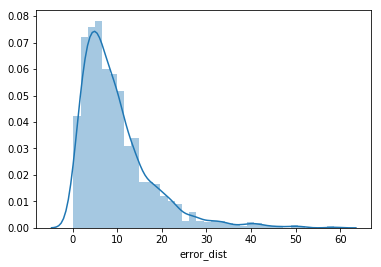

In [724]:
sns.distplot(validation_data_error["error_dist"])

warnings.filterwarnings('ignore')

In [725]:
validation_data_error["error_dist"].describe()

count    1111.000000
mean        9.737164
std         7.974631
min         0.176758
25%         4.272525
50%         7.565463
75%        12.765120
max        58.581137
Name: error_dist, dtype: float64